In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from natsort import natsorted
import matplotlib.pyplot as plt
import decoupler as dc

sns.set_context("paper", font_scale=2) # set some nice global plotting settings.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
tissue = 'Heart'

In [3]:
plate_palette = sns.color_palette("husl", n_colors=3)
sex_palette = ['hotpink','dodgerblue']
geno_palette = ['#DA9CC1', '#F4C245', '#C0BFBF', '#55AF5B', '#4F6EAF', '#52A5DB', '#D83026', '#683C91']


In [ ]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/processed/{tissue}_processed.h5ad')



In [ ]:
adata

In [ ]:
Update other obs 
Tissue_weight_mg, 
ZT, Dissection_time, 
Dissection_date, 
Estrus_cycle, 
Body_weight_g, 
Age_days, 
DOB, 
Notes

def update_mouse_tissue_id(row):
    if row['well_type'] == "Multiplexed" and row['Genotype'] != "tie":
        if row['Genotype'] in ms1:
            return row['Multiplexed_sample1']
        elif row['Genotype'] in ms2:
            return row['Multiplexed_sample2']
    return row['Mouse_Tissue_ID']


obs.apply(update_mouse_tissue_id, axis=1)


In [ ]:
temp = sample_df.copy(deep=True)


In [ ]:
multiplexed_obs = adata.obs[adata.obs['well_type'] == "Multiplexed"]

# Merge with sample_df based on Mouse_Tissue_ID to get updated columns
merged = multiplexed_obs[['Mouse_Tissue_ID']].merge(
    sample_df[['Mouse_Tissue_ID', 'Tissue_weight_mg', 'ZT', 'Dissection_time', 'Dissection_date', 'Estrus_cycle', 'Body_weight_g', 'Age_days', 'DOB', 'Notes']],
    on='Mouse_Tissue_ID',
    how='left')

# Update the relevant columns in adata.obs for the multiplexed rows
adata.obs.update(merged.set_index(adata.obs[adata.obs['well_type'] == "Multiplexed"].index))


In [ ]:
# Select the columns of interest along with Mouse_Tissue_ID
columns_of_interest = ['Mouse_Tissue_ID', 'Tissue_weight_mg', 'ZT', 'Dissection_time', 'Dissection_date', 'Estrus_cycle', 'Body_weight_g', 'Age_days', 'DOB', 'Notes']

# Check for duplicates based on Mouse_Tissue_ID
duplicated_ids = sample_df[sample_df.duplicated(subset='Mouse_Tissue_ID', keep=False)]

# Check if any of the columns of interest have conflicting data for the same Mouse_Tissue_ID
conflicting_rows = duplicated_ids.groupby('Mouse_Tissue_ID').filter(lambda group: group[columns_of_interest[1:]].nunique().max() > 1)

# Show the Mouse_Tissue_IDs with conflicts
conflicting_rows


In [6]:
adata.obs.head()

lab_sample_id sample     plate    subpool  \
cellID                                                                      
D9_G3_H7_Subpool_1_igvf_012   062_WSBJ_10F_06     NA  igvf_012  Subpool_1   
A11_C2_H5_Subpool_1_igvf_012    029_AJ_10M_06     NA  igvf_012  Subpool_1   
A12_E1_C9_Subpool_1_igvf_012    029_AJ_10M_06     NA  igvf_012  Subpool_1   
D3_H7_E6_Subpool_1_igvf_012   057_WSBJ_10M_06     NA  igvf_012  Subpool_1   
A12_H2_H4_Subpool_1_igvf_012    029_AJ_10M_06     NA  igvf_012  Subpool_1   

                             SampleType Tissue     Sex     Age Genotype  \
cellID                                                                    
D9_G3_H7_Subpool_1_igvf_012      Nuclei  Heart  Female  PNM_02     WSBJ   
A11_C2_H5_Subpool_1_igvf_012     Nuclei  Heart    Male  PNM_02       AJ   
A12_E1_C9_Subpool_1_igvf_012     Nuclei  Heart    Male  PNM_02       AJ   
D3_H7_E6_Subpool_1_igvf_012      Nuclei  Heart    Male  PNM_02     WSBJ   
A12_H2_H4_Subpool_1_igvf_012     Nuclei  Heart    Male  PNM_02       AJ   

                             subpool_type  ... total_counts_cb  \
cellID                                     ...                   
D9_G3_H7_Subpool_1_igvf_012            NO  ...         21055.0   
A11_C2_H5_Subpool_1_igvf_012           NO  ...         19332.0   
A12_E1_C9_Subpool_1_igvf_012           NO  ...         17885.0   
D3_H7_E6_Subpool_1_igvf_012            NO  ...         17842.0   
A12_H2_H4_Subpool_1_igvf_012           NO  ...         17279.0   

                             total_counts_mt_cb pct_counts_mt_cb  \
cellID                                                             
D9_G3_H7_Subpool_1_igvf_012                60.0         0.284968   
A11_C2_H5_Subpool_1_igvf_012              147.0         0.760397   
A12_E1_C9_Subpool_1_igvf_012              135.0         0.754822   
D3_H7_E6_Subpool_1_igvf_012                 9.0         0.050443   
A12_H2_H4_Subpool_1_igvf_012               41.0         0.237282   

                             doublet_score predicted_doublet  \
cellID                                                         
D9_G3_H7_Subpool_1_igvf_012       0.124424             False   
A11_C2_H5_Subpool_1_igvf_012      0.064615             False   
A12_E1_C9_Subpool_1_igvf_012      0.085911             False   
D3_H7_E6_Subpool_1_igvf_012       0.013544             False   
A12_H2_H4_Subpool_1_igvf_012      0.054726             False   

                             background_fraction cell_probability  \
cellID                                                              
D9_G3_H7_Subpool_1_igvf_012             0.002275         0.999955   
A11_C2_H5_Subpool_1_igvf_012            0.002219         0.999955   
A12_E1_C9_Subpool_1_igvf_012            0.001229         0.999955   
D3_H7_E6_Subpool_1_igvf_012             0.002516         0.999955   
A12_H2_H4_Subpool_1_igvf_012            0.005067         0.999955   

                                 cell_size droplet_efficiency leiden  
cellID                                                                
D9_G3_H7_Subpool_1_igvf_012   10262.452148           2.084248     13  
A11_C2_H5_Subpool_1_igvf_012   9634.100586           2.042688      1  
A12_E1_C9_Subpool_1_igvf_012   9397.824219           1.935467      9  
D3_H7_E6_Subpool_1_igvf_012    9120.852539           1.993464      5  
A12_H2_H4_Subpool_1_igvf_012   7605.764648           2.330397     31  

[5 rows x 48 columns]

In [7]:
adata.var.head()

gene_id      gene_name     mt  highly_variable  \
gene_name                                                                    
4933401J01Rik  ENSMUSG00000102693.2  4933401J01Rik  False            False   
Gm26206        ENSMUSG00000064842.3        Gm26206  False            False   
Xkr4           ENSMUSG00000051951.6           Xkr4  False             True   
Gm18956        ENSMUSG00000102851.2        Gm18956  False            False   
Gm37180        ENSMUSG00000103377.2        Gm37180  False            False   

                      means  dispersions  dispersions_norm  
gene_name                                                   
4933401J01Rik  1.246747e-05     1.891801         -0.393568  
Gm26206        1.000000e-12          NaN               NaN  
Xkr4           4.856192e-01     3.419744          2.835086  
Gm18956        8.257761e-05     2.577752          0.630941  
Gm37180        1.042528e-02     2.546443          0.584180

In [8]:
def stacked_barplot_proportions(adata, cluster_key, var_key, fsize=(12, 6), annotations=True, reverse_order=False, custom_order=None, custom_colors=None):
    colors = sns.color_palette("husl", n_colors=len(adata[var_key].unique()))

    # Group the data by 'cluster_key' and 'var_key', count occurrences, and calculate proportions
    grouped_data = adata.groupby([cluster_key, var_key]).size().unstack().fillna(0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)

    # Apply custom order if provided
    if custom_order:
        proportions = proportions.loc[custom_order]
    if custom_colors:
        colors = custom_colors

    # Reverse the order of the DataFrame if reverse_order is True
    if reverse_order:
        proportions = proportions.iloc[::-1]
        m = adata.groupby([cluster_key]).size().to_frame().iloc[::-1]
    else:
        m = adata.groupby([cluster_key]).size().to_frame()

    #sns.set_style('white')
    # Create the stacked bar plot
    ax = proportions.plot(kind='barh', color=colors, stacked=True, figsize=fsize, width=0.8, edgecolor=None)

    if annotations:
        for i, txt in enumerate(m[0]):
            ax.text(0.875, i, txt, fontsize=14, va='center', transform=ax.get_yaxis_transform())

    plt.xlim(0, 1.15)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(cluster_key)
    ax.set_title(f'{var_key} by {cluster_key}')

    if annotations:
        ax.legend(title=var_key, bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()

    ax.grid(False)
    
    plt.show()

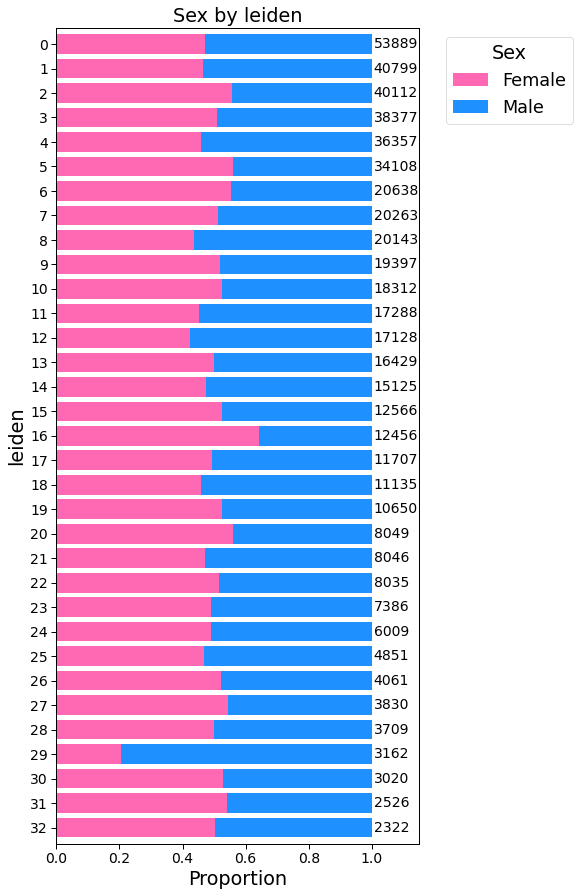

In [9]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Sex',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = sex_palette,
                            annotations = True)


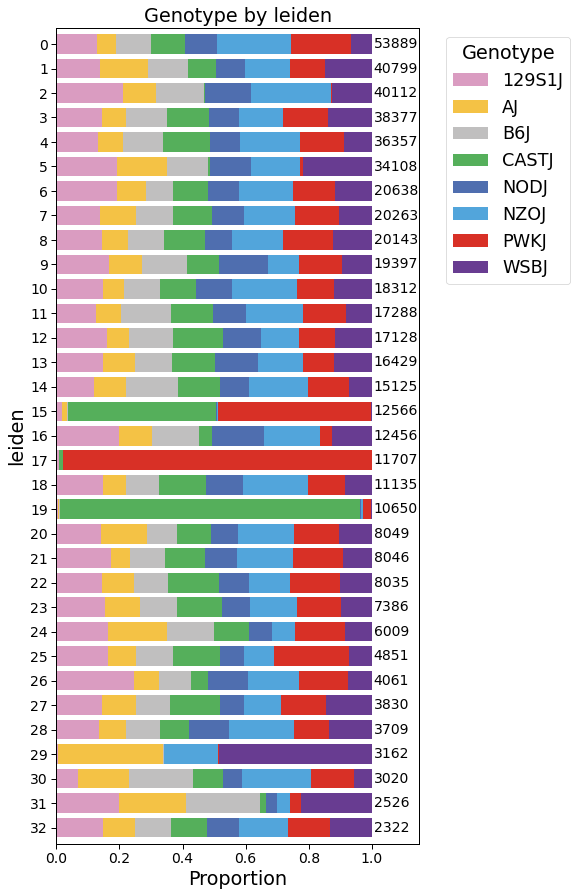

In [10]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'Genotype',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = geno_palette,
                            annotations = True)


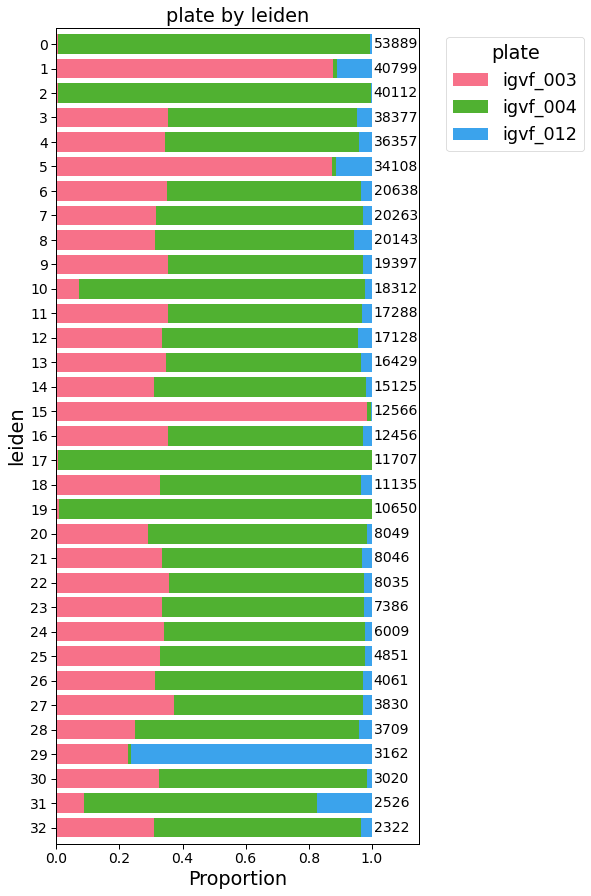

In [11]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'plate',
                            reverse_order = True,
                            fsize = (6.5,15), 
                            custom_colors = plate_palette,
                            annotations = True)


In [12]:
marker_genes_dict= {
    "Fibroblast": ["Dcn","Pdgfra","Bnc2","Col3a1"],
    "Cardiomyocyte": ["Ryr2","Tnnt2","Mybpc3","Myh7","Gata4","Mef2d"],
    "Endothelial": ["Flt1","Pecam1","Kdr"],
    "Pericyte": ["Pdgfrb","P2ry14"],
    "Macrophage": ["F13a1","Adgre1"],
    "Cardiomyocyte_atrial": ['Myl7','Myl4','Nppa'],
    "Epicardial": ["Wt1","Aldh1a2"],
    "Smooth_muscle1": ["Myh11","Mylk","Acta2"],
    "Smooth_muscle2": ["Eln","Tagln"],
    "Endocardial": ["Sox17"],
    "Lymphatic_endothelial": ["Prox1","Flt4","Lyve1"],
    "Adipocyte": ["Adipoq","Pparg"],
    "B_cell": ["Ikzf1","Bcl11a"],
    #"Schwann1": ["Mpz", "Pmp22", "Prx"], # myelinating
    "Schwann2": ["Scn7a","Ncam1","Slc35f1"], # non-myelinating
    "T_cell": ["Themis","Il7r"],
    "Cycling": ["Top2a","Mki67"],
    "Epithelial": ["Cdh1","Klf5"],
    "Liver": ["Alb"],
    "Brain": ["Snap25","Slc17a7"],
}

categories: 0, 1, 2, etc.
var_group_labels: Fibroblast, Cardiomyocyte, Endothelial, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


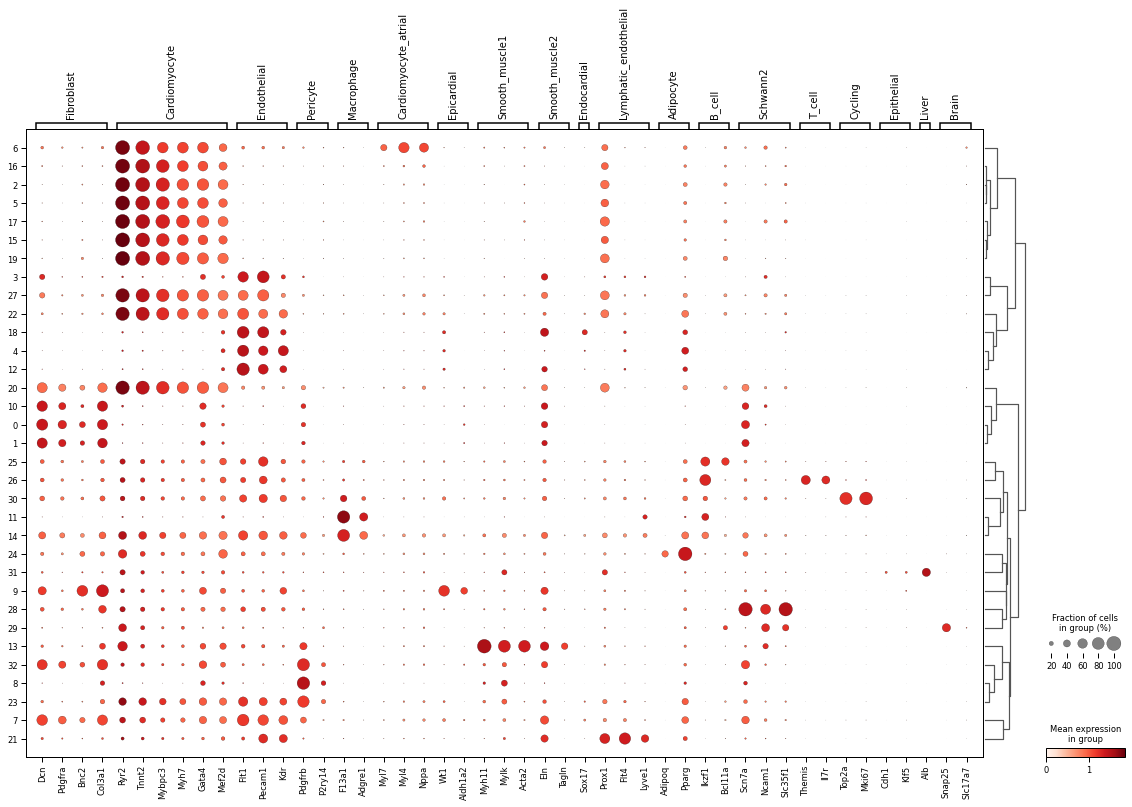

In [13]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)


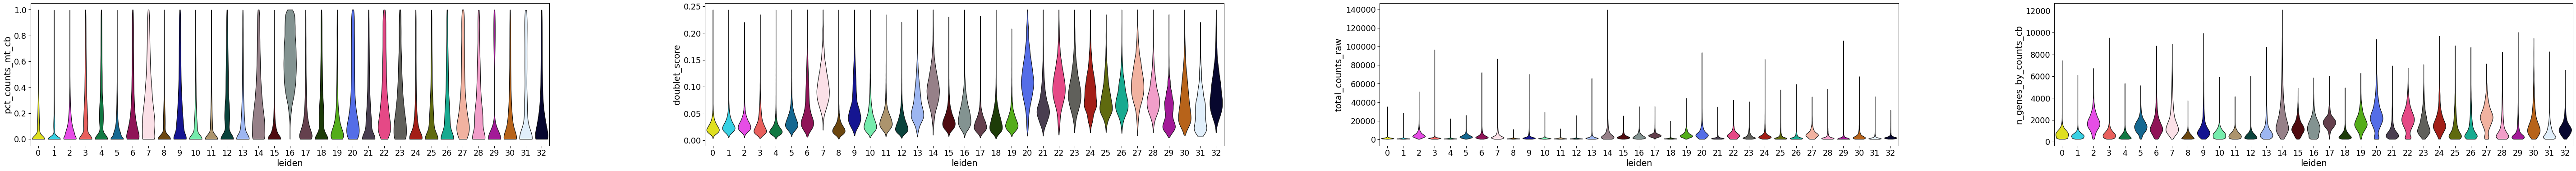

In [47]:
plt.rcParams['figure.figsize'] = (16, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "leiden", 
             jitter=0.4, multi_panel=True, size=0)

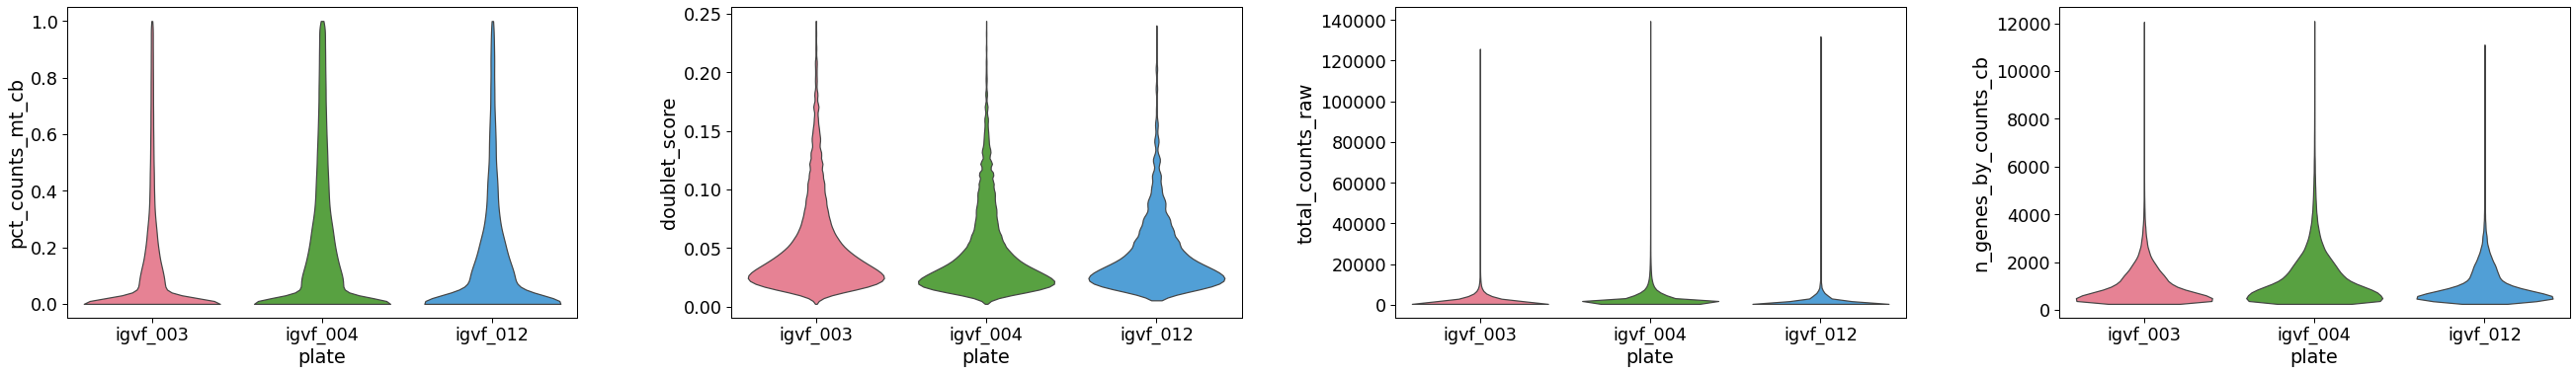

In [46]:
plt.rcParams['figure.figsize'] = (8, 6)

sc.pl.violin(adata, ['pct_counts_mt_cb', 'doublet_score', 'total_counts_raw', 'n_genes_by_counts_cb'],
             groupby = "plate", 
             jitter=0.4, multi_panel=True, size=0)

In [16]:
plt.rcParams['figure.figsize'] = (8, 8)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


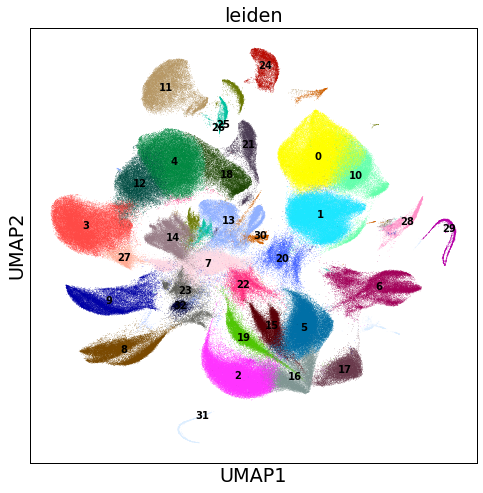

In [17]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


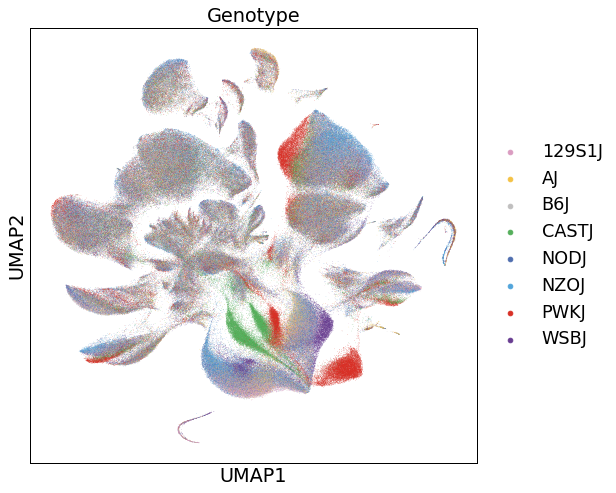

In [18]:
sc.pl.umap(adata, color=['Genotype'], size = 0.8, palette = geno_palette)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


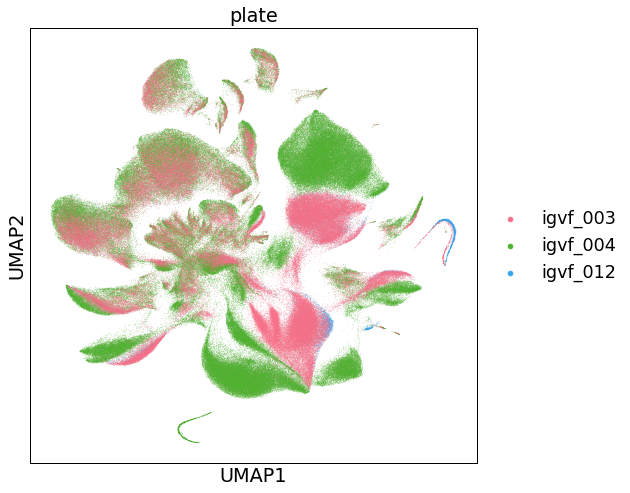

In [19]:
sc.pl.umap(adata, color=['plate'], size = 0.8, palette = plate_palette)


In [23]:
adata

AnnData object with n_obs × n_vars = 531885 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap', 'dendrogram_leiden', 'leiden_colors', 'plate_colors', 'Genotype_colo

In [50]:
plt.rcParams['figure.figsize'] = (8, 8)


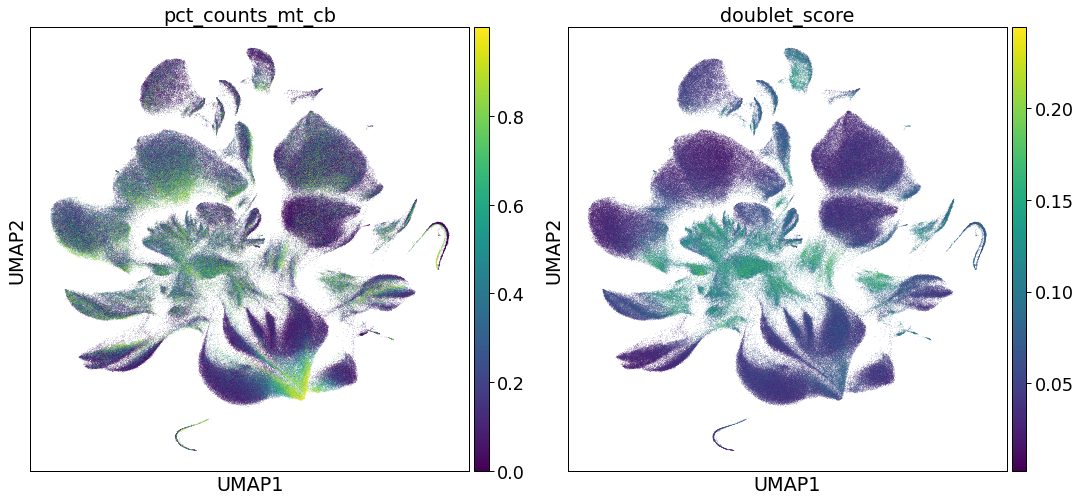

In [25]:
sc.pl.umap(adata, color=['pct_counts_mt_cb','doublet_score'], size = 0.8, palette = plate_palette)


In [26]:
adata

AnnData object with n_obs × n_vars = 531885 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap', 'dendrogram_leiden', 'leiden_colors', 'plate_colors', 'Genotype_colo

In [27]:
# test = adata.obs[adata.obs['doublet_score'] < 0.2]

In [28]:
# test.shape

In [29]:
# adata.obs['leiden'].value_counts()

In [30]:
# test['leiden'].value_counts()

In [31]:
old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')
old_annots['subpool'] = old_annots['subpool'].str.replace(r'Sublibrary_(\d+)', r'Subpool_\1', regex=True)

subpool_mapping = {
    "13A": "Subpool_1",
    "13B": "Subpool_2",
    "13C": "Subpool_3",
    "13D": "Subpool_4",
    "13E": "Subpool_5",
    "13F": "Subpool_6",
    "13G": "Subpool_7",
    "13H": "Subpool_8"
}

# Update the subpool column for the specified plate
old_annots.loc[old_annots['plate'] == 'igvf_012', 'subpool'] = (
    old_annots['subpool'].map(subpool_mapping)
)


old_annots['cellID'] = old_annots['bc1_well'] + "_" + old_annots['bc2_well'] + "_" + old_annots['bc3_well'] + "_" + old_annots['subpool']  + "_" + old_annots['plate'] 



/tmp/ipykernel_3124333/134062919.py:1: DtypeWarning: Columns (11,21,22,23,31,36,37,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  old_annots = pd.read_csv(f'../IGVF_analysis/annotated_tissues/{tissue}_annotated_metadata.csv')


In [33]:
new_cells = adata.obs.index.tolist()
old_cells = old_annots['cellID'].tolist()

new_cells_series = pd.Series(new_cells)
old_cells_series = pd.Series(old_cells)


old_in_new = old_cells_series.isin(new_cells)
new_in_old = new_cells_series.isin(old_cells)


old_not_in_new = old_cells_series[~old_in_new]
new_not_in_old = new_cells_series[~new_in_old]

print(f"Number of old_cells not in new_cells: {len(old_not_in_new)}")

print(f"Number of new_cells not in old_cells: {len(new_not_in_old)}")


Number of old_cells not in new_cells: 41744
Number of new_cells not in old_cells: 69964


In [34]:
old_annots.set_index('cellID', inplace=True)
transfer_df = old_annots[['subtype', 'celltype']]

adata_obs = adata.obs.copy()

# Merge the dataframes, adding the 'subtype' and 'celltype' columns to adata.obs
adata_obs = adata_obs.join(transfer_df, how='left')


In [35]:
# Ensure missing values are explicitly set as NA
adata_obs['subtype'].fillna(value="NA", inplace=True)
adata_obs['celltype'].fillna(value="NA", inplace=True)

In [36]:
adata_obs.head()

lab_sample_id sample     plate    subpool  \
cellID                                                                      
D9_G3_H7_Subpool_1_igvf_012   062_WSBJ_10F_06     NA  igvf_012  Subpool_1   
A11_C2_H5_Subpool_1_igvf_012    029_AJ_10M_06     NA  igvf_012  Subpool_1   
A12_E1_C9_Subpool_1_igvf_012    029_AJ_10M_06     NA  igvf_012  Subpool_1   
D3_H7_E6_Subpool_1_igvf_012   057_WSBJ_10M_06     NA  igvf_012  Subpool_1   
A12_H2_H4_Subpool_1_igvf_012    029_AJ_10M_06     NA  igvf_012  Subpool_1   

                             SampleType Tissue     Sex     Age Genotype  \
cellID                                                                    
D9_G3_H7_Subpool_1_igvf_012      Nuclei  Heart  Female  PNM_02     WSBJ   
A11_C2_H5_Subpool_1_igvf_012     Nuclei  Heart    Male  PNM_02       AJ   
A12_E1_C9_Subpool_1_igvf_012     Nuclei  Heart    Male  PNM_02       AJ   
D3_H7_E6_Subpool_1_igvf_012      Nuclei  Heart    Male  PNM_02     WSBJ   
A12_H2_H4_Subpool_1_igvf_012     Nuclei  Heart    Male  PNM_02       AJ   

                             subpool_type  ... pct_counts_mt_cb doublet_score  \
cellID                                     ...                                  
D9_G3_H7_Subpool_1_igvf_012            NO  ...         0.284968      0.124424   
A11_C2_H5_Subpool_1_igvf_012           NO  ...         0.760397      0.064615   
A12_E1_C9_Subpool_1_igvf_012           NO  ...         0.754822      0.085911   
D3_H7_E6_Subpool_1_igvf_012            NO  ...         0.050443      0.013544   
A12_H2_H4_Subpool_1_igvf_012           NO  ...         0.237282      0.054726   

                             predicted_doublet background_fraction  \
cellID                                                               
D9_G3_H7_Subpool_1_igvf_012                 No            0.002275   
A11_C2_H5_Subpool_1_igvf_012                No            0.002219   
A12_E1_C9_Subpool_1_igvf_012                No            0.001229   
D3_H7_E6_Subpool_1_igvf_012                 No            0.002516   
A12_H2_H4_Subpool_1_igvf_012                No            0.005067   

                             cell_probability     cell_size  \
cellID                                                        
D9_G3_H7_Subpool_1_igvf_012          0.999955  10262.452148   
A11_C2_H5_Subpool_1_igvf_012         0.999955   9634.100586   
A12_E1_C9_Subpool_1_igvf_012         0.999955   9397.824219   
D3_H7_E6_Subpool_1_igvf_012          0.999955   9120.852539   
A12_H2_H4_Subpool_1_igvf_012         0.999955   7605.764648   

                             droplet_efficiency leiden subtype celltype  
cellID                                                                   
D9_G3_H7_Subpool_1_igvf_012            2.084248     13      NA       NA  
A11_C2_H5_Subpool_1_igvf_012           2.042688      1      NA       NA  
A12_E1_C9_Subpool_1_igvf_012           1.935467      9      NA       NA  
D3_H7_E6_Subpool_1_igvf_012            1.993464      5      NA       NA  
A12_H2_H4_Subpool_1_igvf_012           2.330397     31      NA       NA  

[5 rows x 50 columns]

In [37]:
adata_obs['subtype'].value_counts()

subtype
fibroblast                              120079
ventricular cardiac muscle cell         113371
endothelial cell                         87778
NA                                       69964
pericyte                                 28117
macrophage                               27550
regular atrial cardiac myocyte           17509
mesothelial cell of epicardium           16481
smooth muscle cell                       13768
endocardial cell                          9682
endothelial cell of lymphatic vessel      6793
fat cell                                  4430
B cell                                    3930
T cell                                    3335
Schwann cell                              3327
low quality                               2868
cycling                                   2553
epithelial cell                            350
Name: count, dtype: int64

In [38]:
old_annots['subtype'].value_counts()

subtype
fibroblast                              132434
ventricular cardiac muscle cell         116325
endothelial cell                         99058
pericyte                                 33351
macrophage                               28676
regular atrial cardiac myocyte           18057
mesothelial cell of epicardium           17077
smooth muscle cell                       14887
endocardial cell                         11209
endothelial cell of lymphatic vessel      7320
low quality                               5962
fat cell                                  4494
B cell                                    4211
Schwann cell                              4040
T cell                                    3632
cycling                                   2579
epithelial cell                            353
Name: count, dtype: int64

In [39]:
adata.obs['celltype_carryover'] = adata_obs['celltype']
adata.obs['subtype_carryover'] = adata_obs['subtype']

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


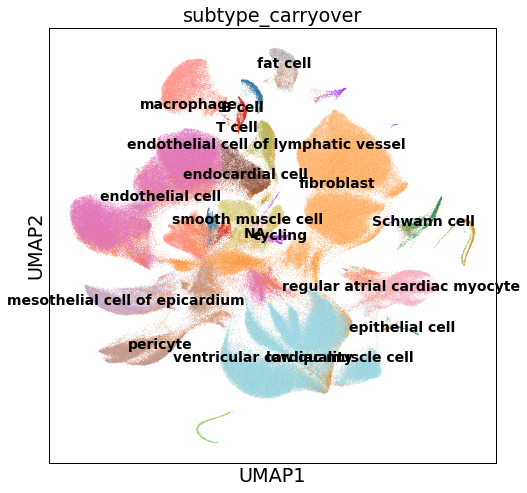

In [40]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1, legend_fontsize = 14, legend_loc = "on data")


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


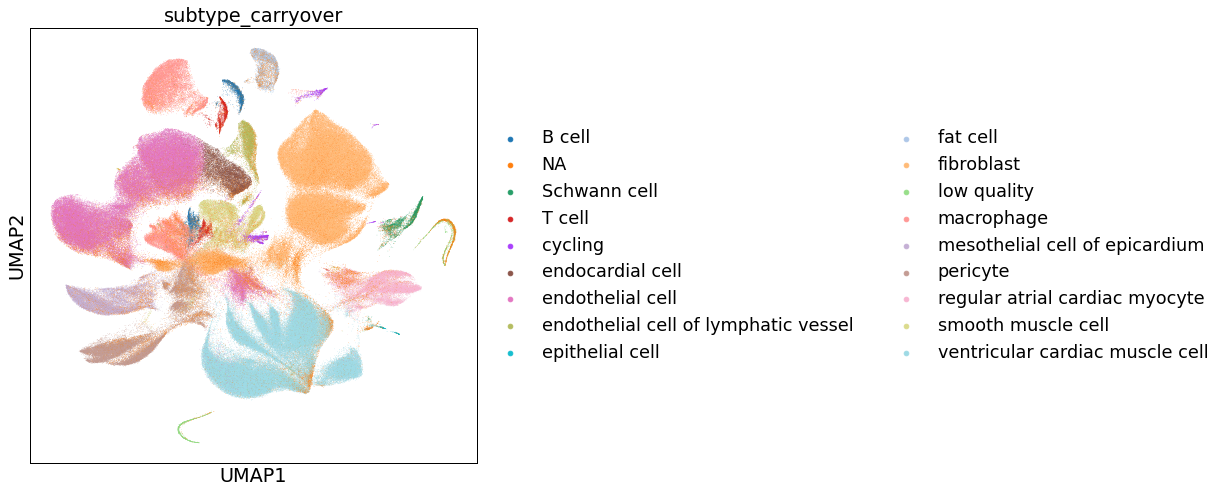

In [41]:
sc.pl.umap(adata, color=['subtype_carryover'], size = 1)


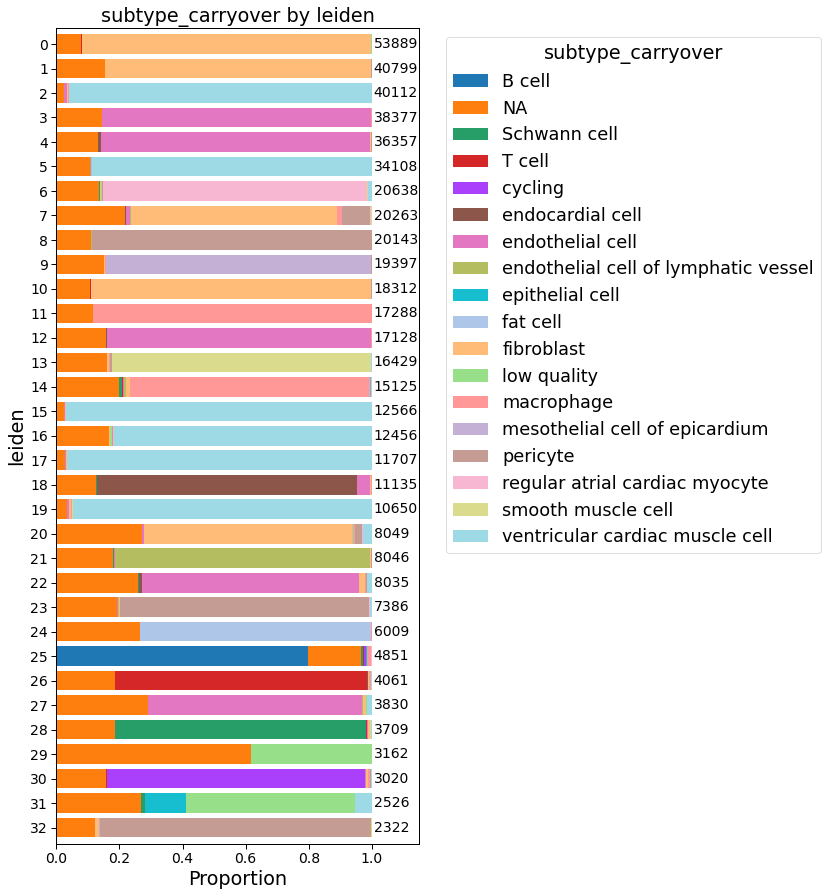

In [42]:
stacked_barplot_proportions(adata.obs, 
                            'leiden', 'subtype_carryover',
                            reverse_order = True,
                            custom_colors = adata.uns["subtype_carryover_colors"],
                            fsize = (6.5,15), 
                            annotations = True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


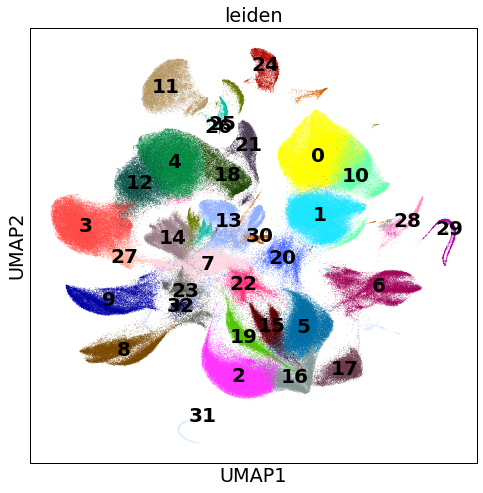

In [44]:
sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize = 20, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


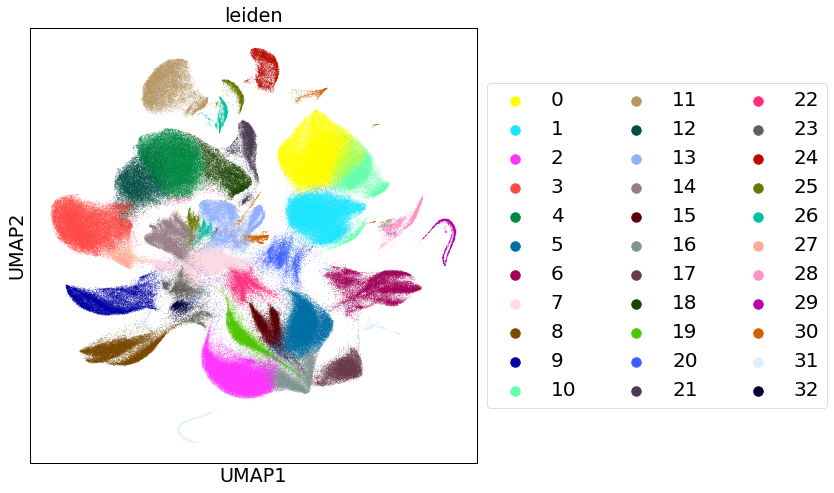

In [52]:
# Plot UMAP
ax = sc.pl.umap(adata, color=['leiden'], size=1, legend_fontsize=20, show=False)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=2, fontsize=20, ncol=3)
plt.show()

categories: 0, 1, 2, etc.
var_group_labels: Fibroblast, Cardiomyocyte, Endothelial, etc.


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


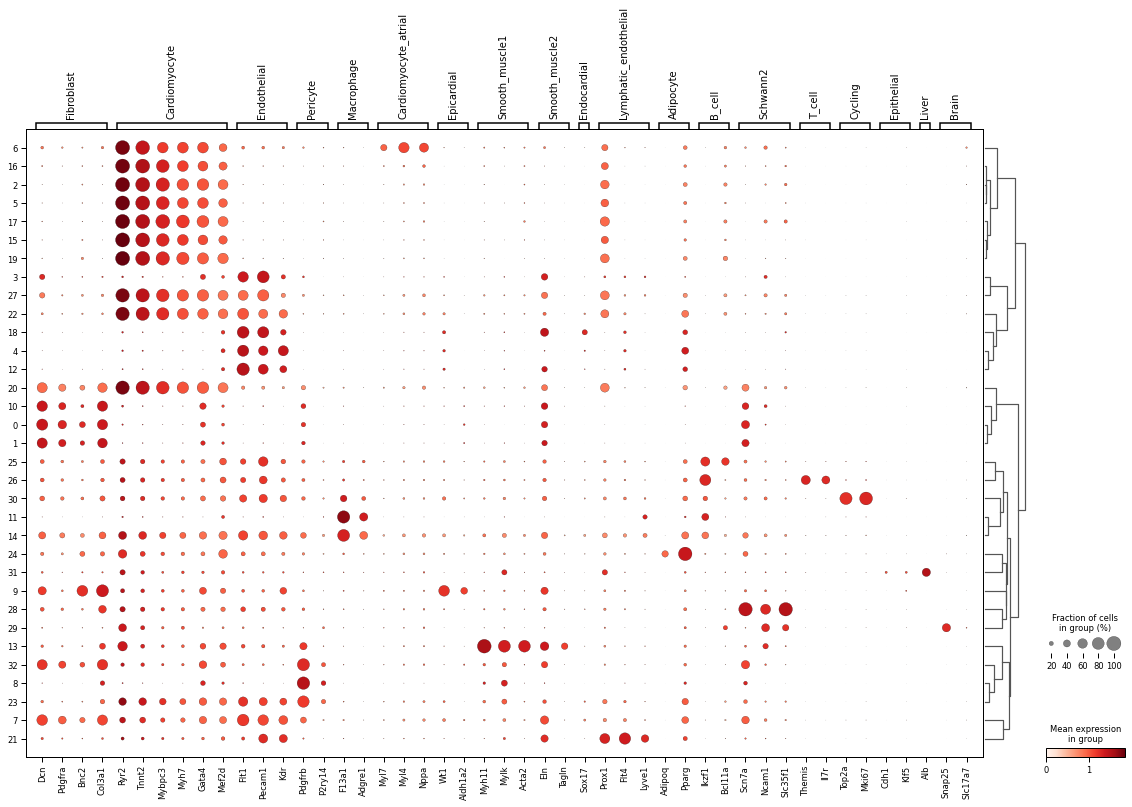

In [48]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden', mean_only_expressed = True,
              dendrogram=True, log=True)



In [88]:
adata.uns['log1p']["base"] = None # probably have to run this line, known scanpy bug.. https://github.com/scverse/scanpy/issues/2239#issuecomment-1104178881 


In [89]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby="leiden", method="t-test")


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragme

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


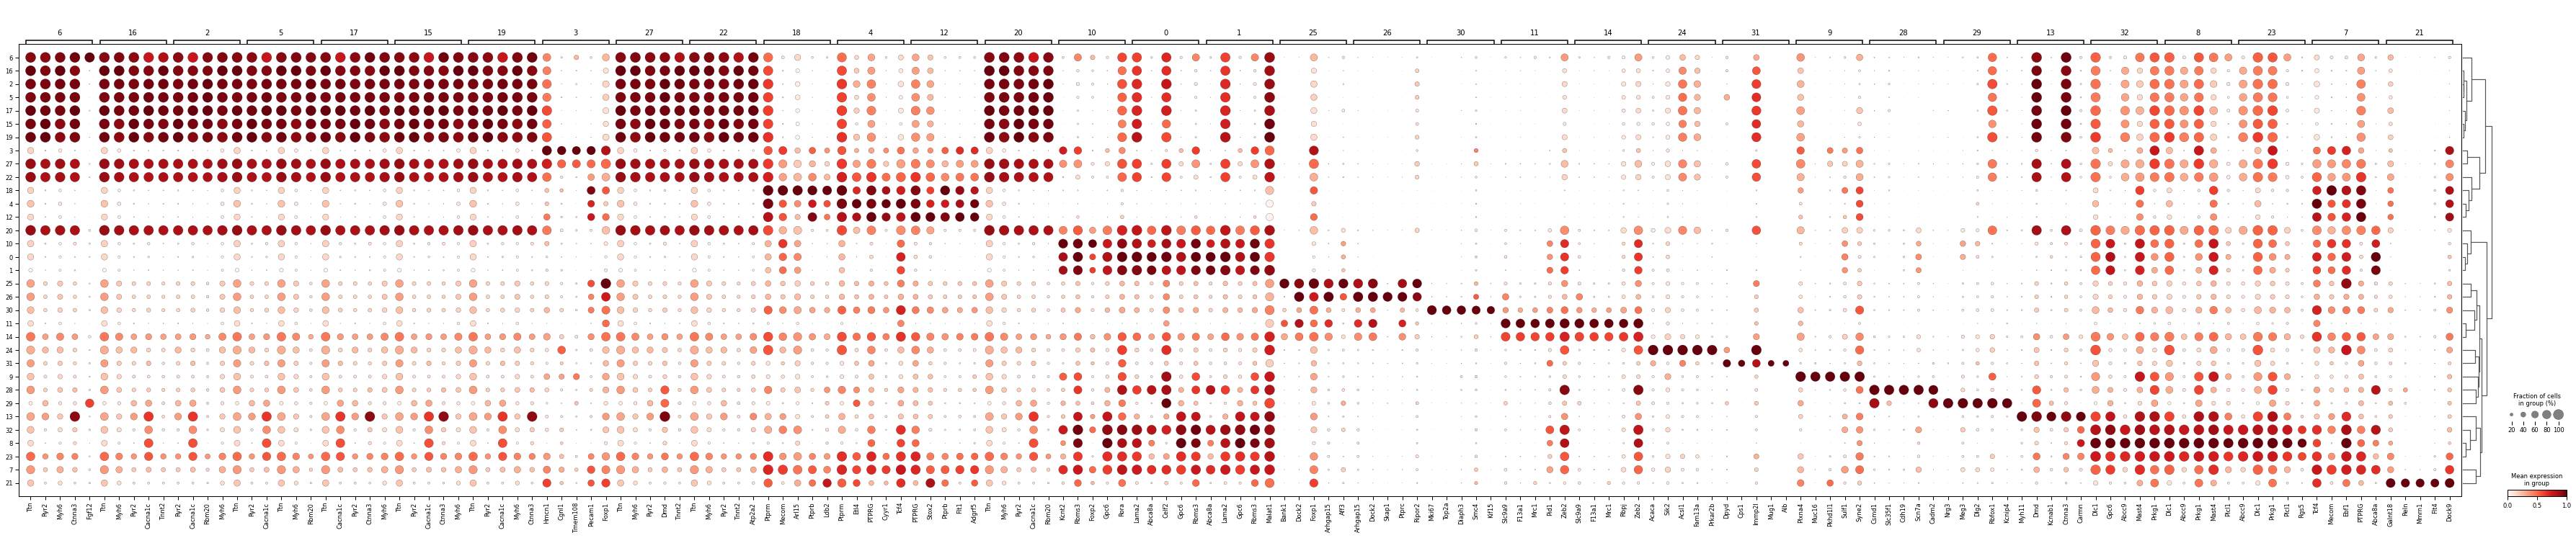

In [90]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden", standard_scale="var", n_genes=5
)

# Annotate

In [79]:
annots = pd.read_csv("post_cellbender_annotations.csv")
annots = annots[annots['tissue'] == tissue]
annots['leiden'] = annots['leiden'].astype(str)




In [80]:
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_celltype'].to_dict()
adata.obs['general_celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['general_CL_ID'].to_dict()
adata.obs['general_CL_ID'] = adata.obs['leiden'].map(annotation_dict)



In [81]:
adata.obs['general_celltype'].value_counts()

general_celltype
cardiac myocyte       142237
fibroblast            113000
endothelial cell      111043
low quality            73718
leukocyte              26200
pericyte               20143
epithelial cell        19397
smooth muscle cell     16429
adipocyte               6009
Schwann cell            3709
Name: count, dtype: int64

In [82]:
531885-73718

458167

In [83]:
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['celltype'].to_dict()
adata.obs['celltype'] = adata.obs['leiden'].map(annotation_dict)
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['CL_ID'].to_dict()
adata.obs['CL_ID'] = adata.obs['leiden'].map(annotation_dict)



In [84]:
annotation_dict = annots.groupby('leiden').head(1).set_index('leiden')['subtype'].to_dict()
adata.obs['subtype'] = adata.obs['leiden'].map(annotation_dict)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


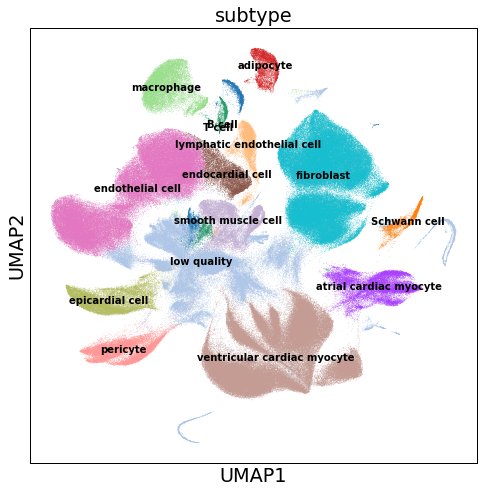

In [85]:
sc.pl.umap(adata, color=['subtype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


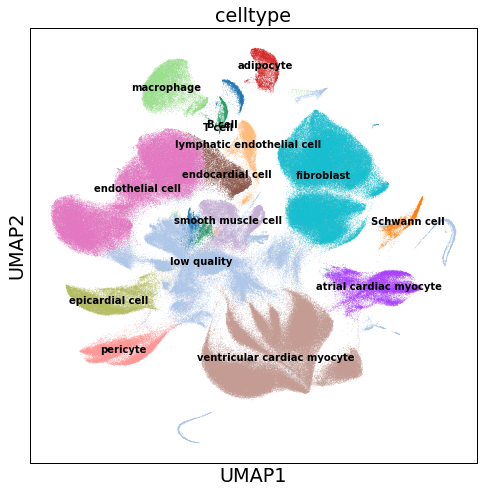

In [86]:
sc.pl.umap(adata, color=['celltype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


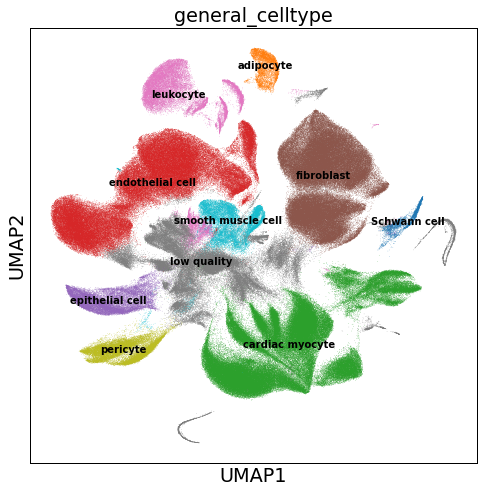

In [87]:
sc.pl.umap(adata, color=['general_celltype'], size=1, legend_fontsize = 10, legend_loc = 'on data')


In [4]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_annotated.h5ad')


In [6]:
adata.obs.drop(columns='celltype_carryover', inplace=True)
adata.obs.drop(columns='subtype_carryover', inplace=True)

In [11]:
meta = adata.obs
meta.to_csv(f"../IGVF_analysis/cellbender_tissues/obs_tables/{tissue}_annotated_metadata.csv")


In [7]:
adata

AnnData object with n_obs × n_vars = 531885 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'subpool_type', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Notes', 'n_genes_by_counts_raw', 'total_counts_raw', 'total_counts_mt_raw', 'pct_counts_mt_raw', 'n_genes_by_counts_cb', 'total_counts_cb', 'total_counts_mt_cb', 'pct_counts_mt_cb', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'leiden', 'general_celltype', 'general_CL_ID', 'celltype', 'CL_ID', 'subtype'
    var: 'gene_id', 'gene_name', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Genotype_colors', 'celltype_colors', 'dendrog

In [8]:
adata.write_h5ad(f'../IGVF_analysis/cellbender_tissues/{tissue}_annotated.h5ad')


In [5]:
adata = sc.read_h5ad(f'../IGVF_analysis/cellbender_tissues/annotated/{tissue}_annotated.h5ad')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


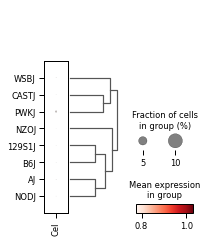

In [6]:
sc.pl.dotplot(adata, 'Cel', 'Genotype', mean_only_expressed = True,
              dendrogram=True, log=True)
